# Exploratory Data Analysis <a id='Exploratory_Data_Analysis'>

In this notebook, we will explore our cleaned movie data for any trends and valuable insights to get a better understanding of the data we are working with. 

Data Source: https://www.kaggle.com/datasets/benjameeper/movie-violencesexprofanity-data?resource=download

## Table of Contents<a id='Table_of_Contents'>

* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
  * [Table of Contents](#Table_of_Contents)
  * [Imports](#Imports)
  * [Functions/Constants](#Functions)
      * [Functions](#Functions_sub)
      * [Constants](#Constants)
  * [Load The Data](#Load_the_Data)
  * [Explore the Data](#Explore_the_Data)
    * [Movies](#Movies_EDA)
        * [Name](#Name)
        * [Year](#Year)
        * [Rating](#Rating)
        * [Duration](#Duration)
        * [Studios](#Studios)
        * [Number of Studios](#number_of_studios)
    * [Movie Tags](#Movie_Tags_EDA)
        * [Category](#Category)
        * [Tag Name](#tag_name)
        * [Occurrence Count](#occurrence_cnt)
        * [Duration (Seconds)](#duration_sec)
  * [Conclusion](#Conclusion)

## Imports <a id='Imports'>

First we will import all the necessary packages we will need for this notebook. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Functions/Constants <a id='Functions'>

Next we will define all of our functions and constants that we will need for this analysis. 

### Functions <a id='Functions_sub'>

Here are our functions that we will be using. These will mostly be used for common graphs that we want to plot. 

In [2]:
def plot_histogram_with_counts(data_frame, column_name, bin_edges=10, title="", title_suffix="",color=None):
    '''Plots a histogram of a specific column from a dataframe. 
    Includes the ability to add number of bins, titles, and colors. '''
    
    plt.clf()
    
    # Create the histogram
    hist, bin_edges, _ = plt.hist(data_frame[column_name], bins=bin_edges, alpha=0.7, color=color,edgecolor='black')

    # Display the count on each bar
    for i, count in enumerate(hist):
        plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, count, str(int(count)), ha='center', va='bottom')

    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.title(title+title_suffix)
    plt.show()

In [3]:
def countplot_y(data,column,bars=10, hue=None,palette=None,title='',legend_title=None,legend=True):
    '''Plots a countplot horizontally for a specific column from a dataframe. 
    Can add hue, palettes, titles, and legends as needed.'''
    
    plt.clf()
    
    counts = data[column].value_counts().sort_values(ascending=False).nlargest(bars)
    
    
    ax = sns.countplot(y=column, data= data,order=counts.index,hue=hue,palette = palette)
    
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 5, p.get_y() + p.get_height() / 2), ha = 'left', va = 'center')

    if legend:
        ax.legend(loc='lower right',title=legend_title)
    else:
        ax.legend_ = None
    
    plt.title(title)
    
    plt.show()

In [4]:
def countplot_x(data,column,bars=10, hue=None,palette=None,title='',legend_title=None,legend=True):
    '''Plots a countplot vertically for a specific column from a dataframe. 
    Can add hue, palettes, titles, and legends as needed.'''
    
    plt.clf()
    
    counts = data[column].str.strip().value_counts().sort_values(ascending=False).nlargest(bars)
    
    ax = sns.countplot(x=column, data=data, order=counts.index, hue=hue, palette = palette)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height() + 5), ha='center', va='bottom')

    if legend:
        ax.legend(loc='lower right', title=legend_title)
    else:
        ax.legend_ = None

    plt.title(title)
    
    plt.show()

### Constants <a id='Constants'>

Here we define our constants which include colors for consistency among our graphs for different Ratings and Categories.

Here is the dictionary for our rating colors. 

In [5]:
rating_colors = {
    'G': 'green',
    'PG': 'orange',
    'PG-13': 'gray',
    'R': 'brown',
    'NR': 'black',
    'TV-MA': 'red',
    'TV-14': 'pink',
    'TV-PG': 'yellow',
    'TV-G': 'lime',
    'TV-Y7': 'cyan'
}

Here is the dictionary for our category colors.

In [6]:
category_colors = {
    'language':'navy',
    'sexual':'hotpink',
    'violence':'maroon',
    'immodesty':'lightpink',
    'drugs':'gray',
    'other':'black'
}

## Load the Data <a id='Load_the_Data'>

Let's now load the data for our cleaned dataframes. 

In [7]:
tags = pd.read_csv('data/clean_data/cleaned_tags.csv')
cleaned_movies_df = pd.read_csv('data/clean_data/cleaned_movies.csv')
movie_tags = pd.read_csv('data/clean_data/cleaned_movie_tags.csv')
split_studios_cleaned_df = pd.read_csv('data/clean_data/split_studios_cleaned_df.csv')

We will first explore our cleaned movies dataframe. 

## Explore the Data <a id='Explore_the_Data'>

### Movies <a id='Movies_EDA'>

Let's start by viewing our cleaned dataframe and then going through each column exploring for any insights. 

In [8]:
pd.set_option('display.max_colwidth', None)
cleaned_movies_df

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
0,tt11274492,The Out-Laws,2023,R,5700,Happy Madison Productions,1
1,tt12263384,Extraction 2,2023,R,7380,Other|AGBO,2
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
3,tt14400246,Bird Box Barcelona,2023,TV-MA,7440,Nostromo Pictures|Other|Other|Other,4
4,tt1745960,Top Gun: Maverick,2022,PG-13,7860,Paramount|Jerry Bruckheimer Films|Other|Tencent Pictures|Skydance,5
...,...,...,...,...,...,...,...
1724,tt6902676,Guns Akimbo,2020,R,5700,Ingenious Media|Other|Other|Other|Other|Other|Other|Other,8
1725,tt3813310,Cop Car,2015,R,5280,Universal Pictures,1
1726,tt2091935,Mr. Right,2016,R,5700,Focus,1
1727,tt13372794,The Manor,2021,TV-MA,4860,Amazon Studios|Blumhouse Television,2


#### Name <a id='Name'>

Starting with the name column, let's see if there are any movies with the same name. 

In [9]:
cleaned_movies_df['name'].value_counts() 

Hypnotic               2
Little Women           2
The Thing              2
The Karate Kid         2
Vice                   2
                      ..
Luck                   1
Gunpowder Milkshake    1
12 Strong              1
Elizabeth              1
Mute                   1
Name: name, Length: 1713, dtype: int64

We see there definitely are some, so let's take a look at all the unique names and sort them by their name so we can see them side by side. We want to confirm these are all different movies and not duplicates. 

In [10]:
# Calculate the count of each movie name
name_counts = cleaned_movies_df['name'].value_counts()

# Filter for names that have a count greater than 1
non_unique_names = name_counts[name_counts > 1]

# Filter the original DataFrame to include only rows with non-unique names
non_unique_names_df = cleaned_movies_df[cleaned_movies_df['name'].isin(non_unique_names.index)]

# Sort the result by the 'name' column
non_unique_names_df_sorted = non_unique_names_df.sort_values(by='name')

non_unique_names_df_sorted

,imdb_id,name,year,mpaa_rating,duration_sec,studio,number_of_studios
1543,tt10691162,Aftermath,2021,TV-MA,6840,Other,1
689,tt4581576,Aftermath,2017,R,5520,Other,1
2,tt16419074,Air,2023,R,6720,Other|Skydance,2
1564,tt2091478,Air,2015,PG-13,5640,Other|Skydance,2
919,tt0112442,Bad Boys,1995,R,7140,Sony,1
902,tt0085210,Bad Boys,1983,R,7380,Sony,1
817,tt5886046,Escape Room,2019,PG-13,6000,Columbia,1
1208,tt5159414,Escape Room,2017,R,4800,Columbia,1
1559,tt3086442,Goodnight Mommy,2014,R,6000,Anchor Bay,1
604,tt9000184,Goodnight Mommy,2022,R,5460,Anchor Bay,1


Looks like the movies with the same titles tend to be remakes or separate movies entirely. Some of these movies do have the same rating as the other movies with the same name, but there are some outliers so the name of the movie may be something that confuses the model for these ones. 

#### Year <a id ='Year'>

Now let's look at the statistics for the Year column. 

In [11]:
cleaned_movies_df.year.describe()

count    1729.000000
mean     2013.166570
std        10.091423
min      1958.000000
25%      2011.000000
50%      2017.000000
75%      2019.000000
max      2023.000000
Name: year, dtype: float64

We see the median for movies is 2017, so it trends to more recent movies since 50 percent fall between 2017-2023 while the remaining 50% stretch between 1958-2017. Let's now view the distribution of the movies that we have.

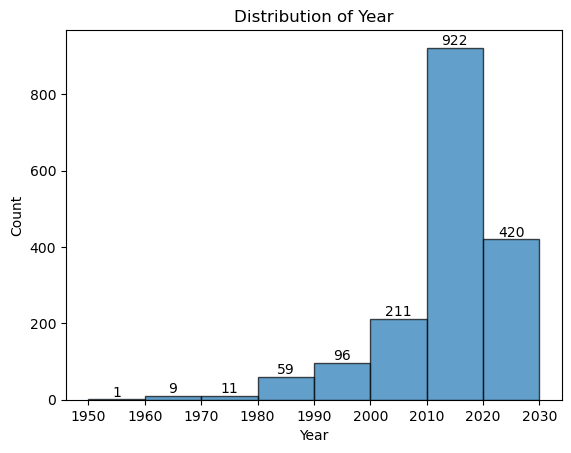

In [12]:
bin_edges = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
plot_histogram_with_counts(cleaned_movies_df, 'year', bin_edges, title='Distribution of Year')

This graph confirms that most of the movies are relatively recent, so our data will skew toward newer movies. But that's not necessarily a bad thing as ratings tend to change over time, so the more recent the data, the more accurate our predictions can be. We can also look at the distribution for each type of movie rating. 

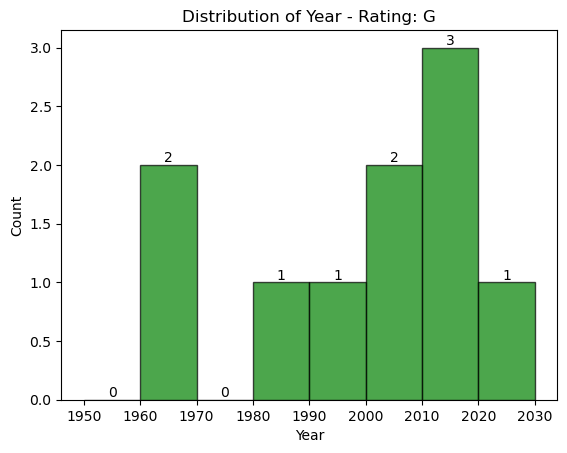

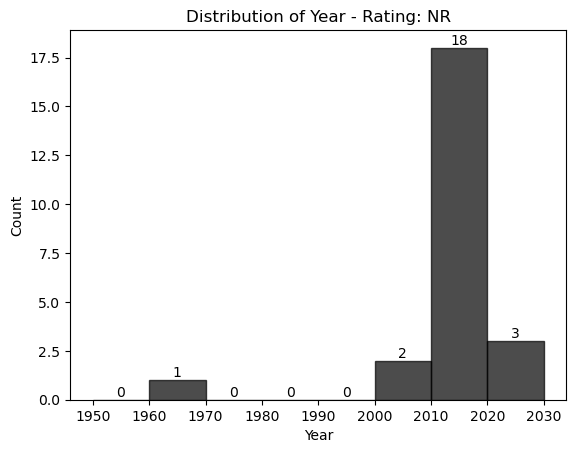

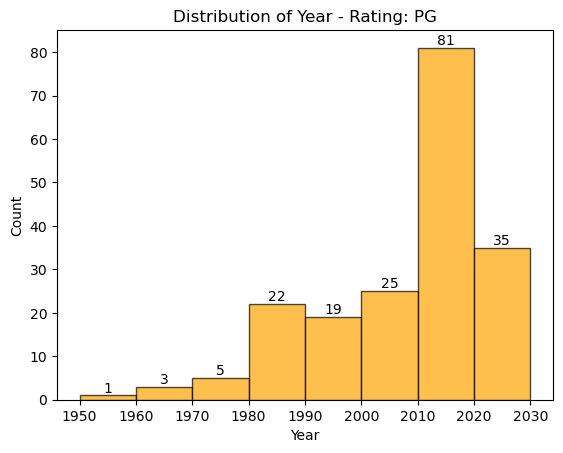

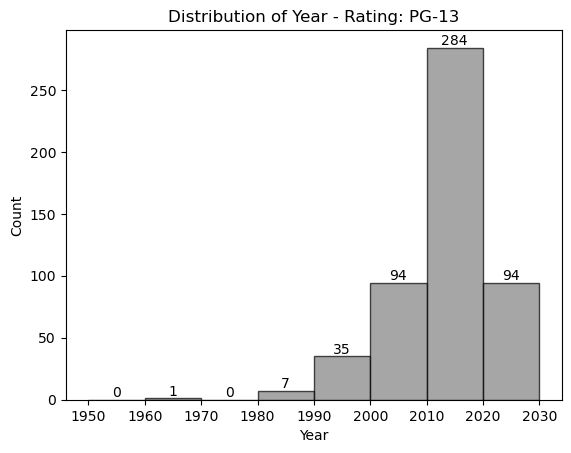

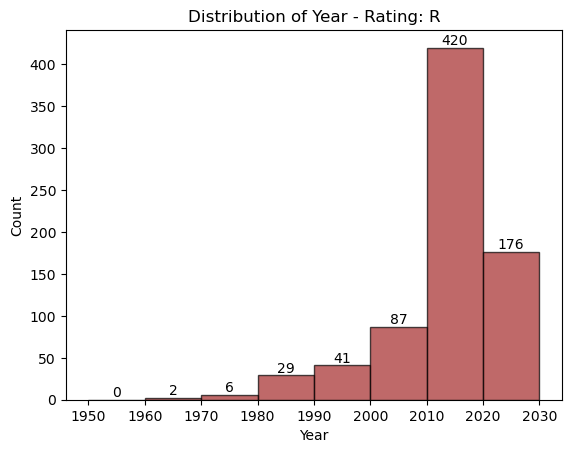

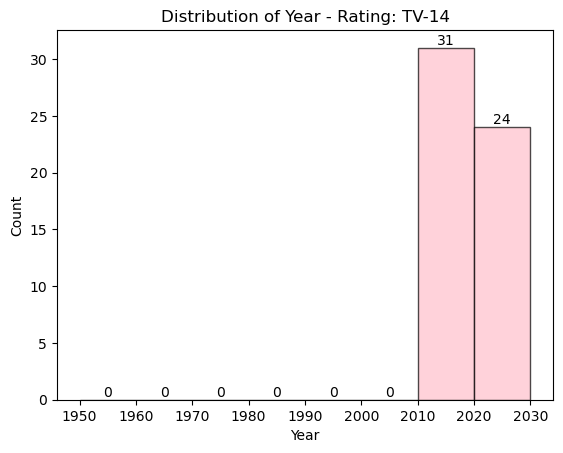

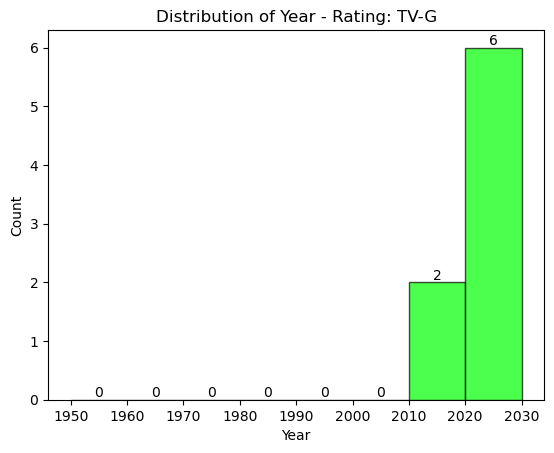

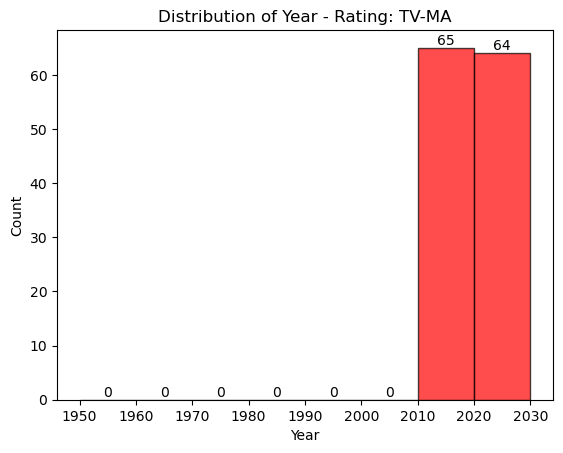

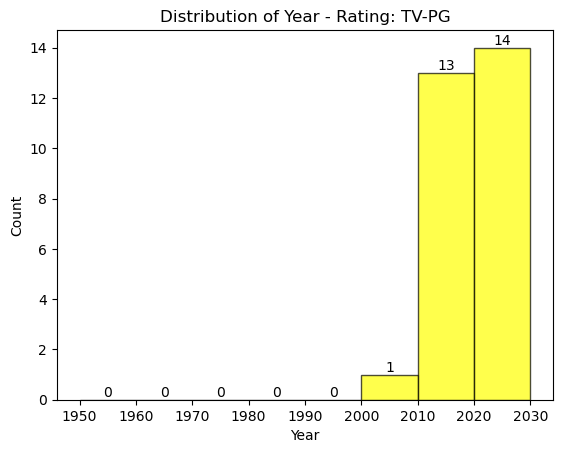

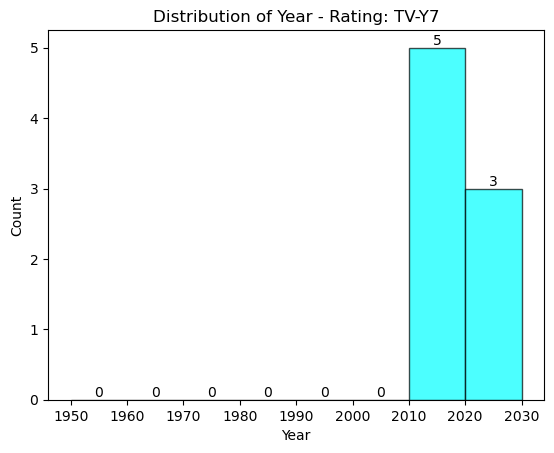

In [13]:
for mpaa_rating, group_df in cleaned_movies_df.groupby('mpaa_rating'):
    color = rating_colors.get(mpaa_rating, 'blue')  # Use blue as default color if rating not found in dictionary
    plot_histogram_with_counts(group_df, 'year', title='Distribution of Year',title_suffix=' - Rating: '+mpaa_rating, color=color, bin_edges=bin_edges)

All the ratings seem to be skewed as well toward the 2010-2020 period which tracks with our overall numbers. The two that seem to be ratioed the most to older movies are PG and PG-13, but they still follow the general trend. 

#### Rating<a id='Rating'>

Let's now look at the Ratings. 

In [14]:
cleaned_movies_df.mpaa_rating.describe()

count     1729
unique      10
top          R
freq       761
Name: mpaa_rating, dtype: object

R is the most common rating we have in our dataset. Let's look at the full distribution. 

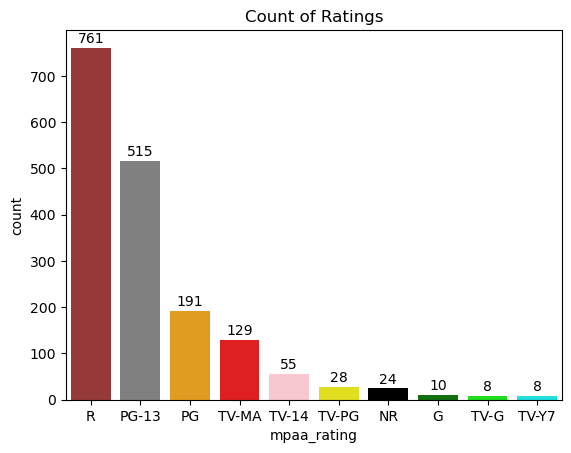

In [15]:
#def countplot(data,column,bars=10, hue=None,legend_title=None,legend=True):
countplot_x(cleaned_movies_df, 'mpaa_rating', palette = rating_colors,legend=False, title='Count of Ratings')

Looking at the counts of ratings, we see R and PG-13 are the most common from our dataset. We don't have as many TV ratings as we do movie ratings, so it may make sense to combine them at some point, but we'll leave them as separate for now. 

### Duration <a id='Duration'>

Let's now look at Duration. 

In [16]:
cleaned_movies_df.duration_sec.describe()

count     1729.000000
mean      6501.174089
std       1071.217737
min       1943.000000
25%       5760.000000
50%       6360.000000
75%       7080.000000
max      12540.000000
Name: duration_sec, dtype: float64

We see that the average movie duration is 6500 seconds which is around 108 minutes. This is also a common movie time for most movies that come out these days so that average makes sense. The longeset movie is 12540 which is around a 3.5 hour movie. The shortest movie is around 30 minutes which would be more around a TV show length. That does make sense since there are some TV show ratings mixed in. Let's look at the full distribution. 

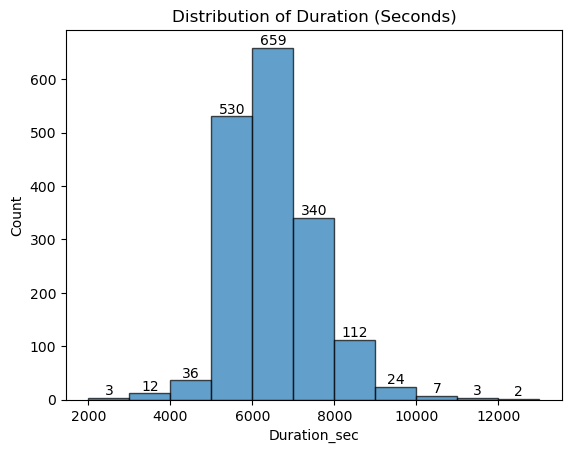

In [17]:
bin_edges = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000,13000]
plot_histogram_with_counts(cleaned_movies_df, 'duration_sec',bin_edges=bin_edges, title='Distribution of Duration (Seconds)')

We see it mimics a normal distribution for the duration of these movies. Here is a breakdown to help interpret the results:

    2000 sec = 33 minutes
    4000 sec = 1 hour 7 minutes
    6000 sec = 1 hour 40 minutes
    8000 sec = 2 hour 13 minutes
    10000 sec = 2 hour 47 minutes
    12000 sec = 3 hours 20 minutes

Let's now look at the duration for each rating.

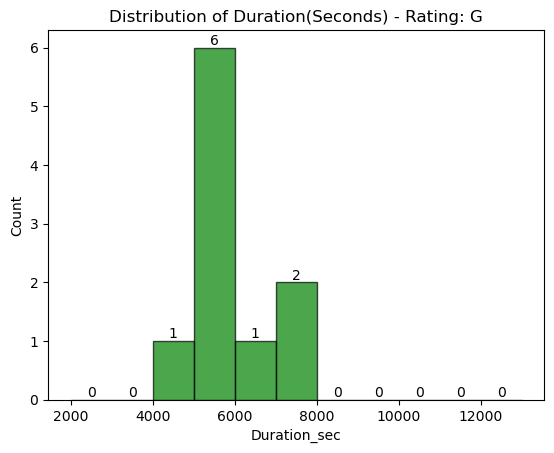

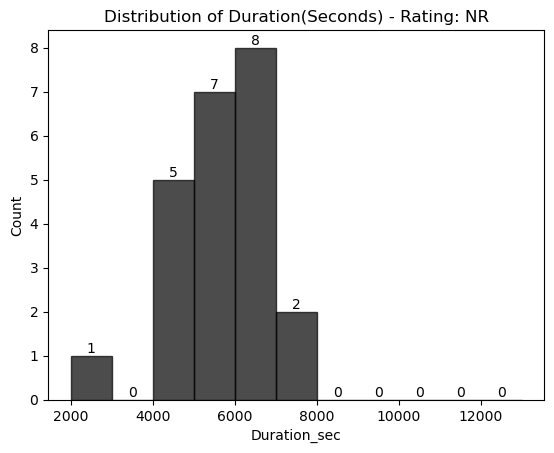

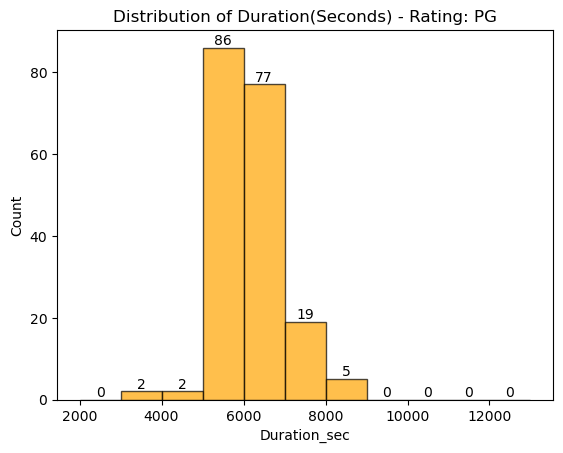

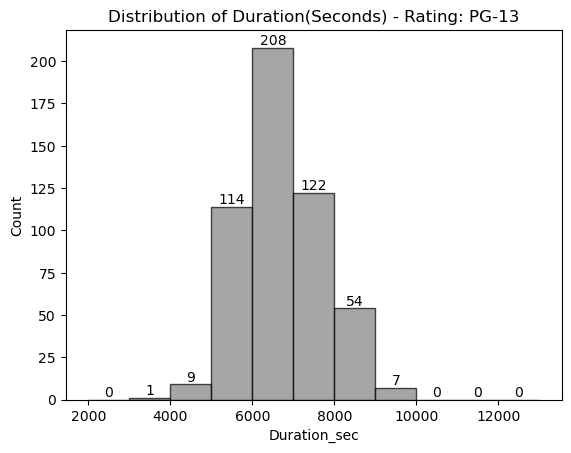

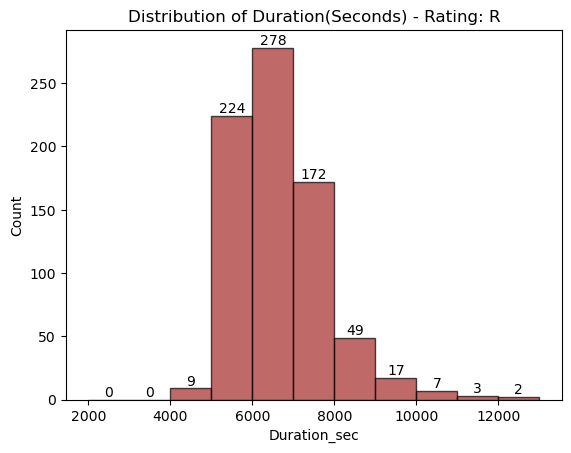

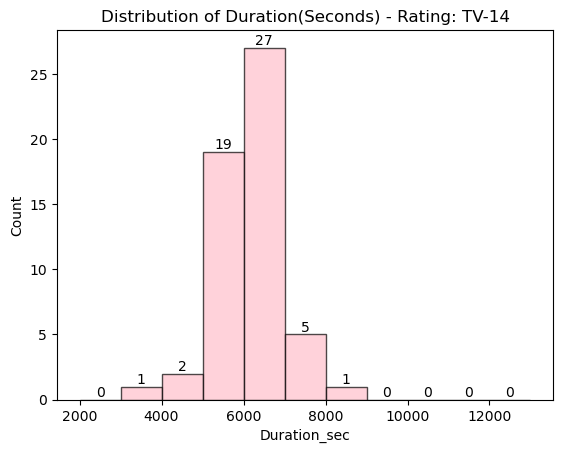

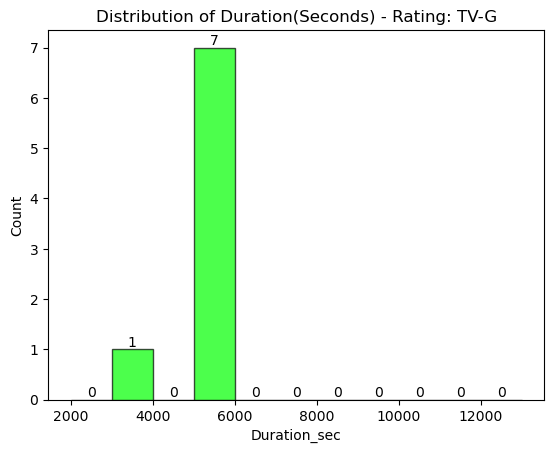

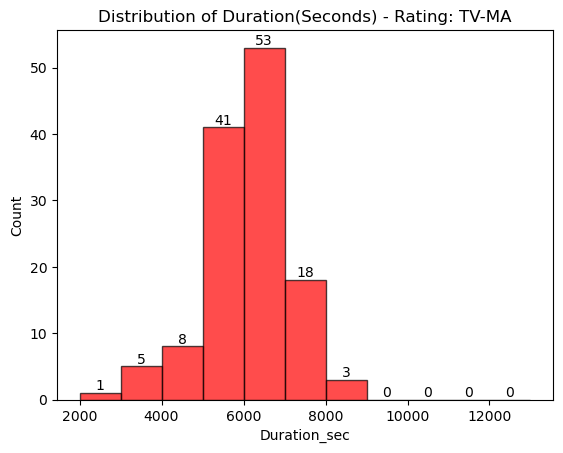

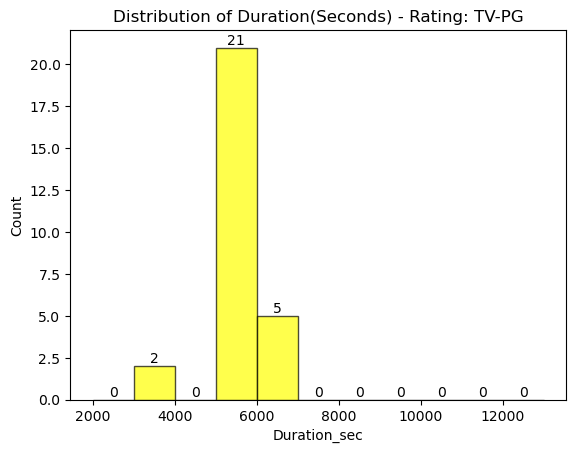

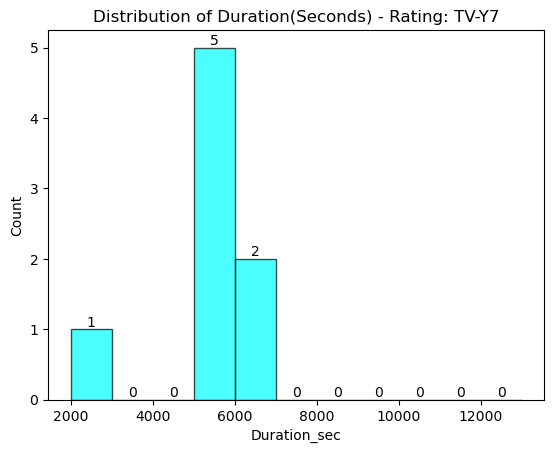

In [18]:
for mpaa_rating, group_df in cleaned_movies_df.groupby('mpaa_rating'):
    color = rating_colors.get(mpaa_rating, 'blue')  # Use blue as default color if rating not found in dictionary
    plot_histogram_with_counts(group_df, 'duration_sec', title='Distribution of Duration(Seconds)',title_suffix=' - Rating: '+mpaa_rating, color=color, bin_edges = bin_edges)

We see the TV ratings tend to be shorter in length but still have peaks around the mean. We see that R ratings tend to skew longer. So a trend that could be argued is that if a movie is longer, it has a higher liklihood of having a more severe rating (PG-13/R). 

#### Studios <a id='Studios'>

Let's now take a look at the studios. Previously in our cleaning step, we found that there were many studios that worked together on movies which resulted in movies having multiple studios hidden within the studio column. We had broken them up in our cleaning step into a dataframe that split out specifically the studios for each movie, as well as the rating. Here it is for reference.

In [19]:
split_studios_cleaned_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,mpaa_rating
0,Happy Madison Productions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
1,Other,AGBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
2,Mandalay Pictures,Amazon Studios,Skydance,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
3,Nostromo Pictures,Other,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV-MA
4,Paramount,Jerry Bruckheimer Films,NaN,Other,Tencent Pictures,Skydance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,Ingenious Media,Other,Other,Other,Other,Other,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
1725,Universal Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
1726,Focus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R
1727,Amazon Studios,Blumhouse Television,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV-MA


In our cleaning step, we had updated the studios with the new mapping for similar studios, then removed any duplicates, and then replaced unique studios with 'Other'. Now that we have the updated studios, we can melt the table so there is one row per studio with the rating of that movie. Using the movie Extraction 2 as an example, we see it has two studios, Other and AGBO. We will create two rows for this movie, one for each studio as well as the rating. This will allow us to look at the distribution of movies for each studio. Some movies may have multiple 'Other' studios, but this is still valid as those would be separate studios if we didn't classify them as 'Other'. 

In [20]:
melted_studios = split_studios_cleaned_df.melt(id_vars='mpaa_rating', value_name='studio').drop(columns='variable')
melted_studios = melted_studios[melted_studios['studio'] != '']
filtered_melted_studios = melted_studios[melted_studios['studio'].notna()]
filtered_melted_studios

,mpaa_rating,studio
0,R,Happy Madison Productions
1,R,Other
2,R,Mandalay Pictures
3,TV-MA,Nostromo Pictures
4,PG-13,Paramount
...,...,...
22965,R,Other
24694,R,Other
26423,R,Movistar+
28152,R,Other


After melting the table, we see there are 2990 rows for all the studios in our dataset. The same movie can have multiple rows here, but all we care about for this part of the analysis is the rating for each studio. Let's look at the counts for each studio. 

In [21]:
studio_counts = filtered_melted_studios['studio'].value_counts() 
studio_counts

Other                   1308
Universal Pictures       225
Paramount                170
Sony                     147
Lions Gate               101
                        ... 
Tyler Perry Studios        3
Screen Arcade              3
87Eleven Productions       3
Material Pictures          3
Movistar+                  3
Name: studio, Length: 169, dtype: int64

We see the studio with the most movies is Other with 1308 which makes sense as there are a lot of studios only represented a couple times. The first studio that is not Other is Universal Pictures with a count of 225. We see there are 169 movie studios with 3 or more movies. Let's take a look at the top 12 studios and see how many they have. 

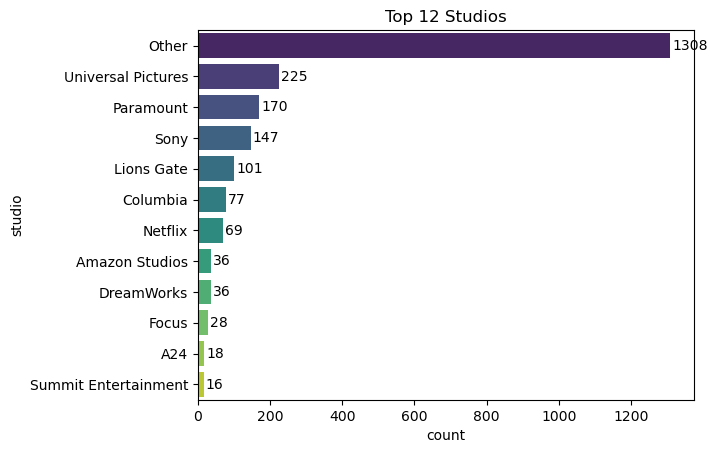

In [22]:
top_n = 12
countplot_y(filtered_melted_studios,'studio',bars=top_n,legend=False,palette='viridis', title='Top '+str(top_n)+' Studios')

After the top 6 (not including Other), the number of movies drops to below 50 movies. Let's look at the distribution of ratings for these top 12 studios. 

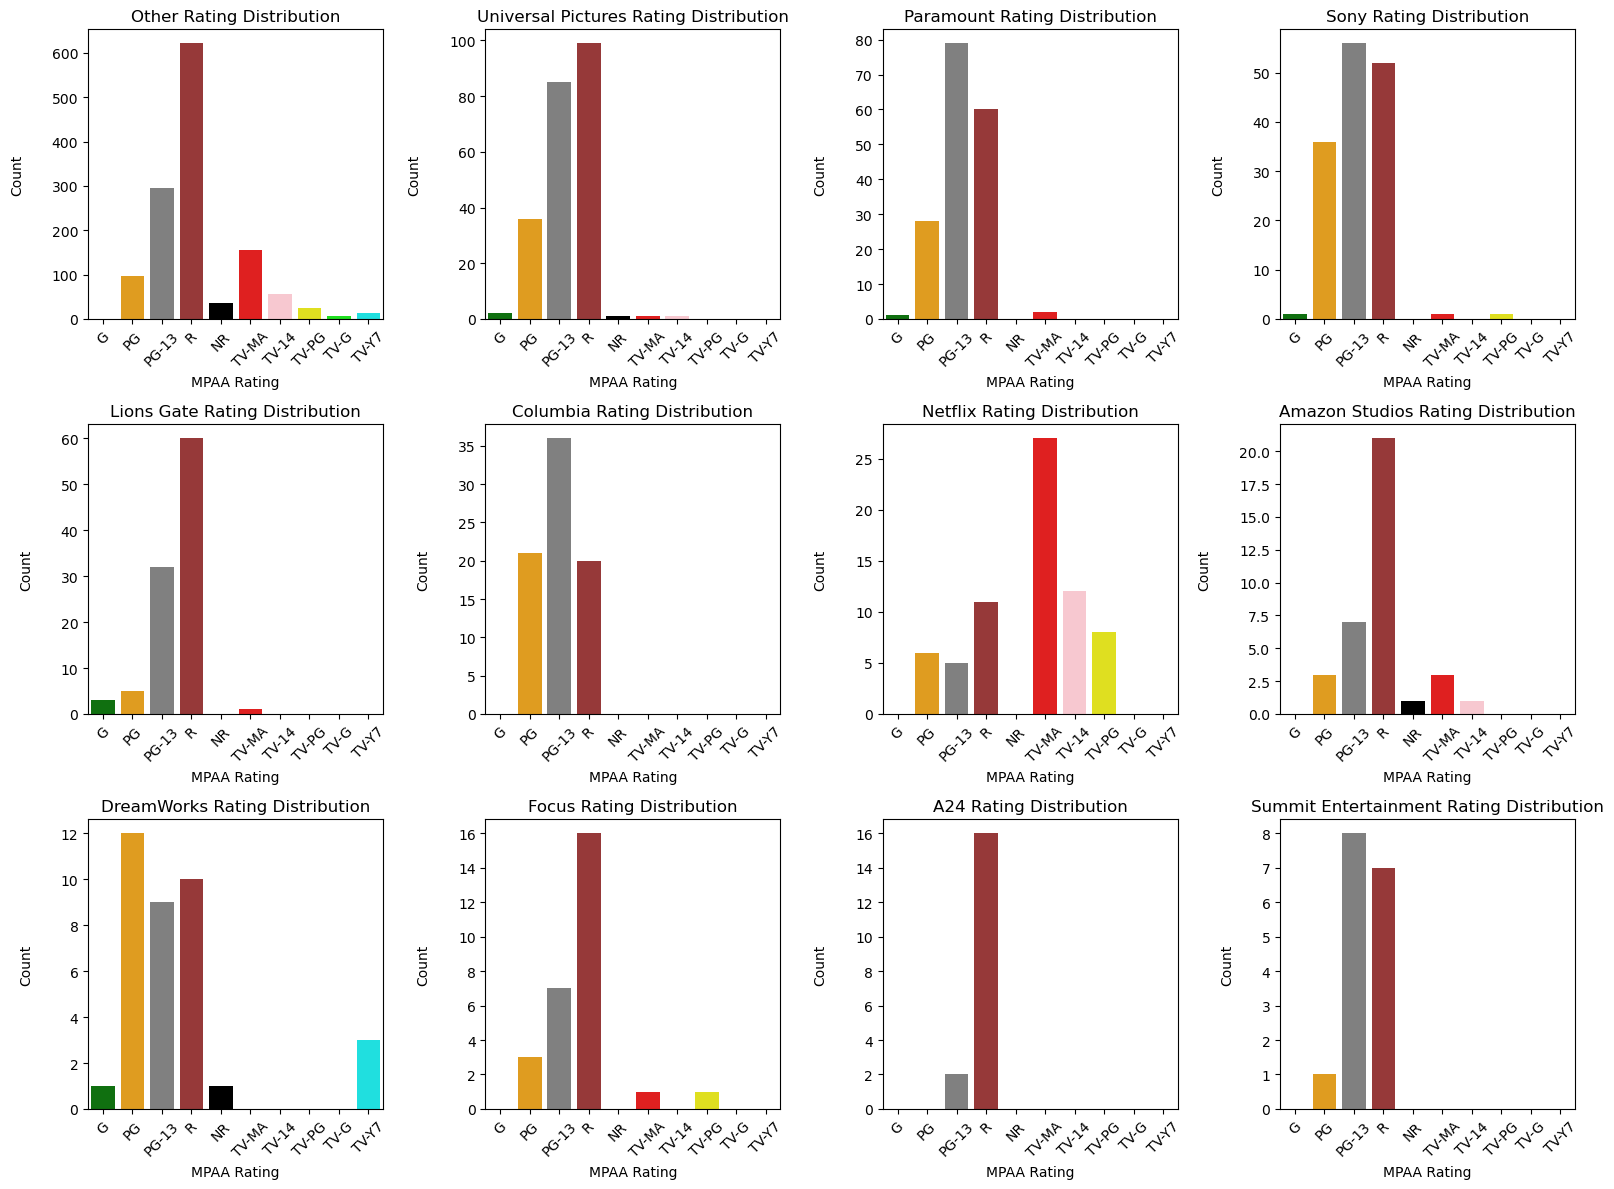

In [23]:
# Define a custom color palette for the rating categories
rating_order = ['G', 'PG', 'PG-13', 'R', 'NR', 'TV-MA', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y7']

# Select the top N studios based on counts
top_studios = studio_counts.nlargest(top_n)

# Determine the number of rows and columns for the grid
n_cols = 4
n_rows = math.ceil(top_n / n_cols)

# Create the main figure for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

# Loop through each top studio and create a count plot for each rating category
for i, (studio, ax) in enumerate(zip(top_studios.index, axes.flatten())):
    studio_data = filtered_melted_studios[filtered_melted_studios['studio'].str.contains(studio, na=False)]
    
    sns.countplot(data=studio_data, x='mpaa_rating', palette=rating_colors, ax=ax, order=rating_order)
    ax.set_title(f'{studio} Rating Distribution')
    ax.set_xlabel('MPAA Rating')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.yaxis.labelpad = 20

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the entire grid of subplots
plt.show()

We see for the majority of studios, R is the most common rating among them with PG-13 coming in second. This matches the expected distribution we were seeing when looking at the ratings holistically. One interesting note is with Netflix where a majority of the movies are TV-MA as opposed to R like most of the other studios. We also see a spike in PG-13 movies for the top 3 non Other studios, so the more common studios tend to make more PG-13 movies than other studios. Looking at the studios grouped into Other, we see that R is double the next most common rating, so if it's a unique studio, there is a higher liklihood it will be an R rating. 

#### Number of Studios <a id='number_of_studios'>

Let's see if any trends lie in the number of studios. 

In [24]:
cleaned_movies_df['number_of_studios'].describe()

count    1729.000000
mean        1.720069
std         1.474810
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: number_of_studios, dtype: float64

We see that the average is at 1.7 studios, so most have between 1 and 2 studios. The most studios a movie had was 18 but it doesn't seem to be very common based on the overall statistics of the data. Let's now look at the counts for each of the different number of studios. 

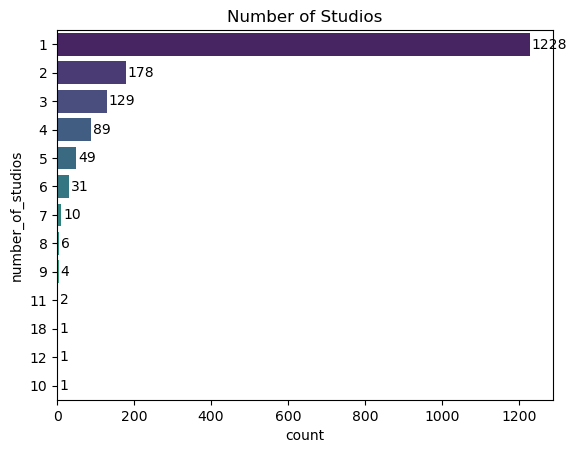

In [25]:
countplot_y(cleaned_movies_df,'number_of_studios',bars=15,legend=False,palette='viridis', title='Number of Studios')

As suspected, 1 and 2 are the top two numbers of studios, with 1 having a majority of the total data. The really high studio counts are a lot less common, so those won't be as useful in the analysis. Let's now look at if there are any trends with the rating for number of studios. 

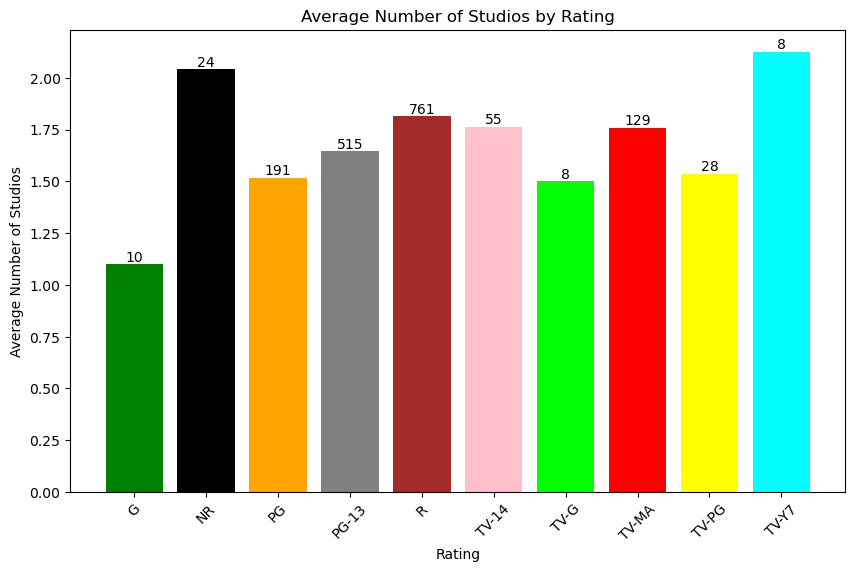

In [26]:
# Group the DataFrame by 'mpaa_rating' and calculate both the mean number of studios and the count of movies
rating_studios_avg = cleaned_movies_df.groupby('mpaa_rating')['number_of_studios'].mean().reset_index()
rating_movie_count = cleaned_movies_df['mpaa_rating'].value_counts().reset_index()
rating_movie_count.columns = ['mpaa_rating', 'movie_count']

# Merge the two DataFrames on 'mpaa_rating'
rating_data = pd.merge(rating_studios_avg, rating_movie_count, on='mpaa_rating')

# Create a bar plot to visualize the relationship with custom colors
plt.figure(figsize=(10, 6))
plt.bar(
    rating_data['mpaa_rating'],
    rating_data['number_of_studios'],
    color=[rating_colors.get(rating, 'blue') for rating in rating_data['mpaa_rating']]
)
plt.xlabel('Rating')
plt.ylabel('Average Number of Studios')
plt.title('Average Number of Studios by Rating')
plt.xticks(rotation=45)

# Adding the count of total movies as text on top of the bars
for i, count in enumerate(rating_data['movie_count']):
    plt.text(i, rating_data['number_of_studios'][i] , f'{count}', ha='center', va='bottom')

plt.show()

We see overall, there isn't much of a trend in regards to average number of studios and a specific rating type. Some of the ones with less volume in our data are more on the extremes, but everything falls right around the average with no particular outliers. This shows that regardless of the type of movie, studios can collaborate with each other.

Now we have gone through all the columns in our cleaned movies dataframe, so let's now look at the movie tags. 

### Movie Tags <a id='Movie_Tags_EDA'>

As a reminder for movie tags, we have a dataframe that includes a row for each type of tag in a movie and includes how many times it has occurred in the movie as well as how long it occurred. A movie may have multiple rows if there are multiple tags for that movie.

In [27]:
movie_tags

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
0,tt0052357,language,blasphemy,1,0.1
1,tt0052357,violence,non_graphic,5,30.0
2,tt0052357,violence,disturbing_images,1,0.1
3,tt0052357,immodesty,immodesty,1,6.0
4,tt0052357,immodesty,nudity_implied,1,30.0
...,...,...,...,...,...
23975,tt9902160,violence,non_graphic,9,18.0
23976,tt9902160,violence,graphic,4,12.0
23977,tt9902160,immodesty,immodesty,3,30.0
23978,tt9902160,sexual,sexually_suggestive,1,6.0


Let's first take a look at the category column. 

#### Category <a id='Category'>

The category column is the general field a tag falls in and categorizes them. Here are the different categories that can be used:

    language
    violence
    immodesty
    sexual
    drugs
    other

Let's see what the most frequent category is.

In [28]:
movie_tags.category.describe()

count        23980
unique           6
top       language
freq          6168
Name: category, dtype: object

We see Language is the most common category, but it makes up around 25% of the data, so there is a relatively even distribution among all the categories. Let's look at the exact counts. 

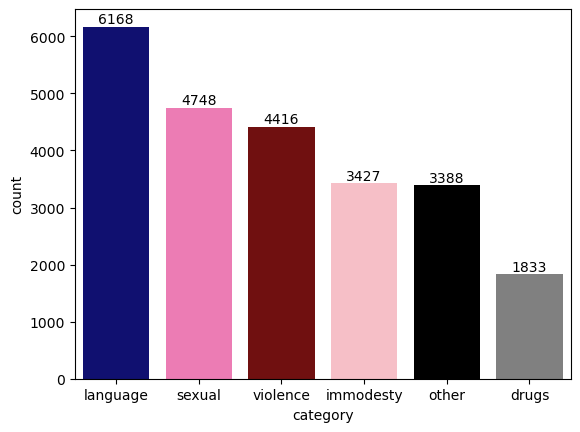

In [29]:
countplot_x(movie_tags,'category', hue=None,palette=category_colors,legend_title=None,legend=False)

It looks like after language, all of sexual, violence, immodesty, and other are around similar levels, with drugs having the fewest amount in this dataset. Let's now take a look at the tag names to see if there are any trends when getting more specific into the type of tag. 

#### Tag Name <a id= 'tag_name'>

Let's first take a look at the counts for each tag name. 

In [30]:
movie_tags['tag_name'].value_counts()

blasphemy              1658
profanity              1652
non_graphic            1632
immodesty              1487
sexual_reference       1452
graphic                1248
kissing_normal         1111
sexually_suggestive    1052
bodily_functions       1048
nudity_without_sex      920
childish_language       880
disturbing_images       870
objectionable           827
kissing_passion         798
sex_implied             742
drugs_implied           640
drugs_legal             639
vulgar_gestures         597
drugs_illegal           554
nudity_implied          542
racial_slurs            526
nudity_art              478
sexual_assault          473
gore                    379
sex_without_nudity      345
medical_graphic         322
medical_procedures      301
life_events             293
violence_implied        287
sex_with_nudity         227
Name: tag_name, dtype: int64

Blasphemy and profanity are the top two which are both under language which explains why that one is the most common category. We see a steady decline of the counts for each of the different tag names, but enough data for them to be considered in our analysis. 

In [31]:
movie_tags.tag_name.describe()

count         23980
unique           30
top       blasphemy
freq           1658
Name: tag_name, dtype: object

Let's now take a look at all the different categories that these fall into. I will look at the top 15 of the 30 tag names that we have to get an idea of where the majority fall. 

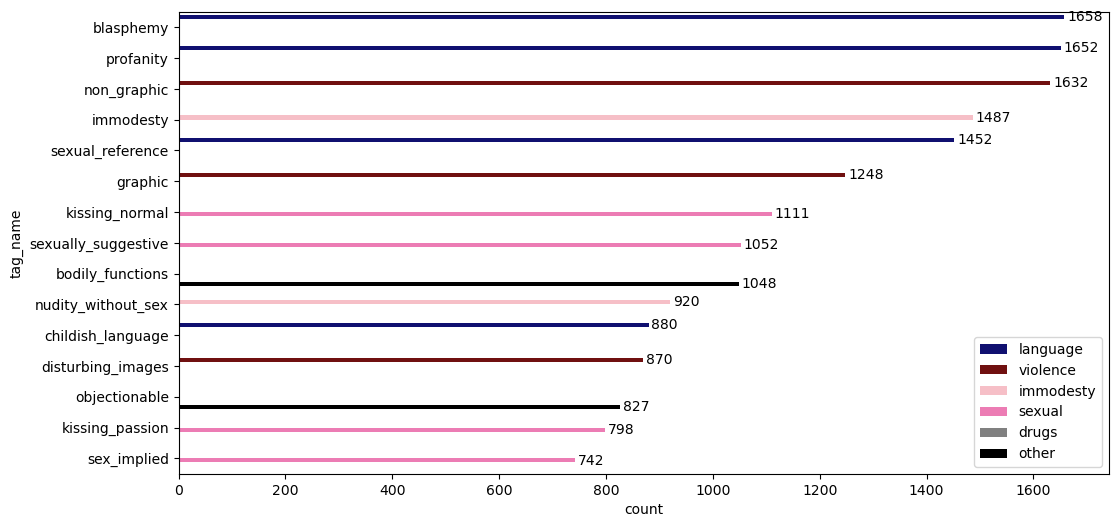

In [32]:
plt.figure(figsize=(12, 6))
countplot_y(movie_tags,'tag_name', bars = 15, hue='category',palette=category_colors,legend_title=None,legend=True)

We see that 4/15 are language, 3/15 are violence, 2/15 are immodesty, 4/15 are sexual, 0/15 are drugs, and 2/15 are other. A pretty even mix except for drugs not being represented which makes sense since that is the lowest of the categories. Now let's look at Occurrence Count. 

#### Occurrence Count <a id='occurrence_cnt'>

The Occurrence Count is the number of times the tag occurs in a movie. For example, a movie may have multiple bad words said, so each instance would count as an occurance. Let's take a look at the breakdown of the occurences. 

In [33]:
movie_tags.occurrence_cnt.describe()

count    23980.000000
mean        12.620225
std         28.444183
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max        883.000000
Name: occurrence_cnt, dtype: float64

We see the average is just over 12 occurances for each tag. However, we see that 75% of the data falls within 1-12, so our average is skewed by the high amounts. We see it maxes out at 883 occurrances, but the typical counts are most likely on the lower end. Let's look at the top 30 counts that we have for occurrences. 

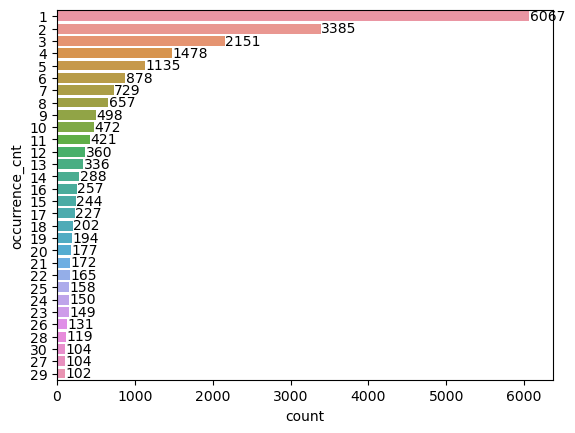

In [34]:
countplot_y(movie_tags,column='occurrence_cnt',bars=30,legend=False)

We see that the most common occurence count is 1 and the top 10 are the counts 1-10 which makes sense for why 75% of the data skews on the lower half. Let's compare the occurence counts to the duration column and see if we can find any useful insights. 

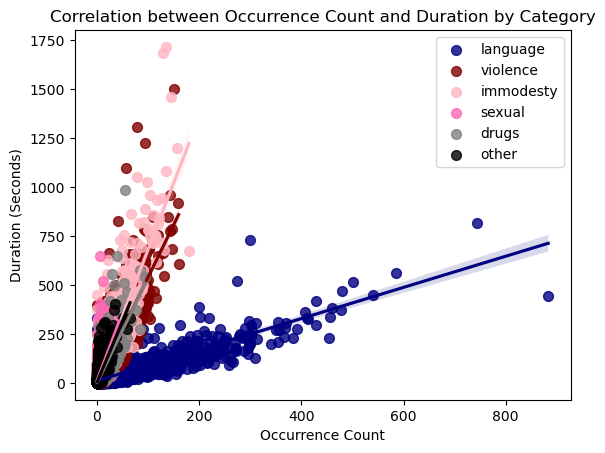

In [35]:
# Iterate through each category and plot separate scatter plots
for category in movie_tags['category'].unique():
    category_data = movie_tags[movie_tags['category'] == category]
    category_color = category_colors.get(category, 'blue')  # Use 'blue' as default color if category not found in dictionary
    sns.regplot(x='occurrence_cnt', y='duration_sec', data=category_data, scatter_kws={'s': 50, 'color': category_color}, line_kws={'color': category_color},label=category)

plt.xlabel('Occurrence Count')
plt.ylabel('Duration (Seconds)')
plt.title('Correlation between Occurrence Count and Duration by Category')
plt.legend()
plt.show()

We can see from the above graph that if there is a high occurrence count, the tag will most likely have the category of language. These ones will also not have as high of a duration. For all the other categories, their occurrence counts are much smaller, but the duration tends to be higher. So our model may be able to make some predictions regarding these trends where if there is a high occurrence count, it will consider it a language category which may help in determining the rating. Let's look at Duration a bit more. 

#### Duration (Seconds) <a id='duration_sec'>

The duration is how long the tag occurs for in a movie. For some types of tags, it may be happening throughout an entire scene which may cause it to have a long duration. Othertimes, it may happen quickly and have a short duration. Let's look at some of the statistics behind it. 

In [36]:
movie_tags.duration_sec.describe()

count    23980.000000
mean        45.823057
std         84.703623
min          0.100000
25%          6.000000
50%         18.000000
75%         48.000000
max       1716.000000
Name: duration_sec, dtype: float64

We see that the average duration is around 45 seconds, but 50% of the data falls within 6 and 48 seconds. This means our average is affected by long duration outliers. The max is 1716 seconds (28.6 minutes) which shows there are some outliers. Let's try to review a histogram to see where everything is concentrated. 

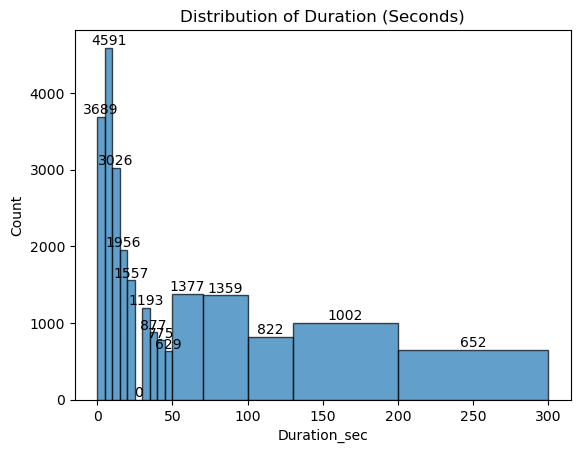

In [37]:
bin_edges = [ 0, 5, 10, 15, 20, 25, 30,35, 40,45, 50,70,100,130,200,300]
#plt.xlim(0, 300)
#take the log
plot_histogram_with_counts(movie_tags, 'duration_sec', title='Distribution of Duration (Seconds)', bin_edges=bin_edges)

Due to the long and uneven distribution for the duration, I had to get a bit creative with the buckets for the histogram. We see there are a lot of extremely short durations where a majority of the data is under 50 seconds. Under 50, I did buckets every 5 seconds so a lot of short durations. As the duration gets longer, there are less and less occurrences so the buckets became bigger. After 50, I increased the buckets by 20, 30, 70, and 100 seconds respectively. We see similar numbers as a result. Ultimately, what this is telling us is that most of the durations are short and concentrated under 50 seconds. Let's now explore some of the outliers with durations are over 1000 seconds. 

In [38]:
movie_tags[movie_tags.duration_sec > 1000]

,imdb_id,category,tag_name,occurrence_cnt,duration_sec
1415,tt0105236,violence,graphic,57,1098.0
6399,tt1034415,immodesty,nudity_without_sex,79,1050.0
6908,tt1078940,immodesty,immodesty,145,1458.0
7002,tt10954652,immodesty,immodesty,98,1026.0
7932,tt11804152,violence,graphic,151,1500.0
8638,tt12676326,immodesty,immodesty,130,1686.0
9289,tt13320622,immodesty,immodesty,156,1200.0
11026,tt1564367,immodesty,immodesty,136,1080.0
15150,tt3072482,violence,graphic,95,1224.0
15717,tt3460252,violence,graphic,78,1308.0


There are only 11 tags that are over 1000 seconds in duration, and they all are either graphic violence or immodesty. Both of these make sense since violence can be attributed to any extended action scene, while immodesty can correspond to anyone in a scene that is wearing skimpy outfits. Let's now review to see if there are any durations where category is a factor. 

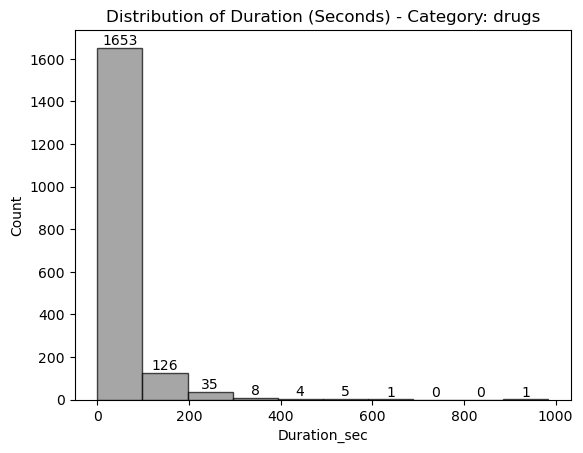

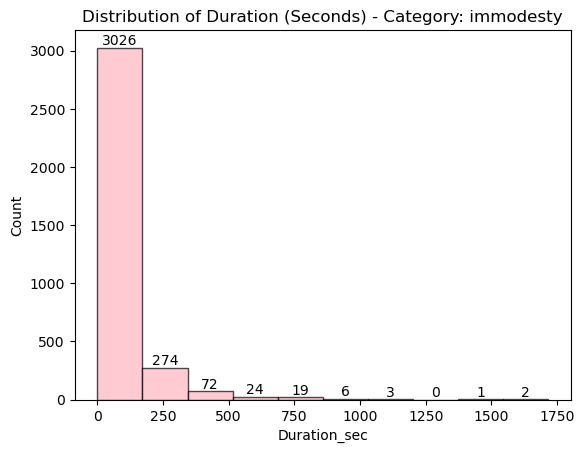

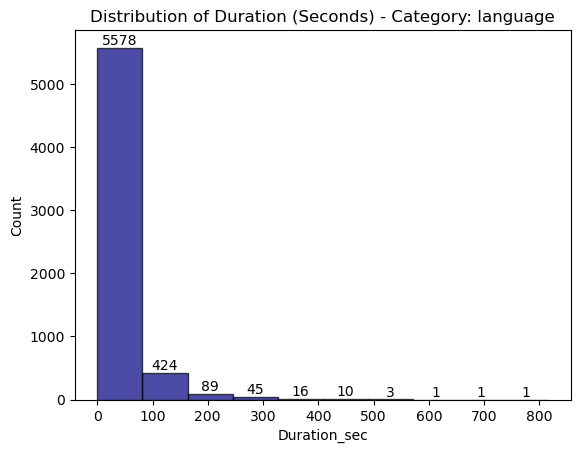

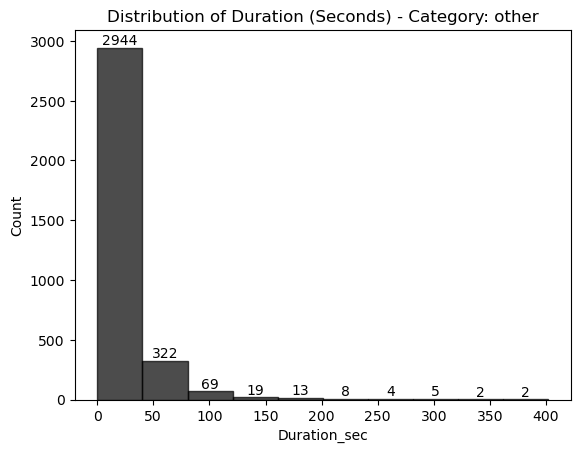

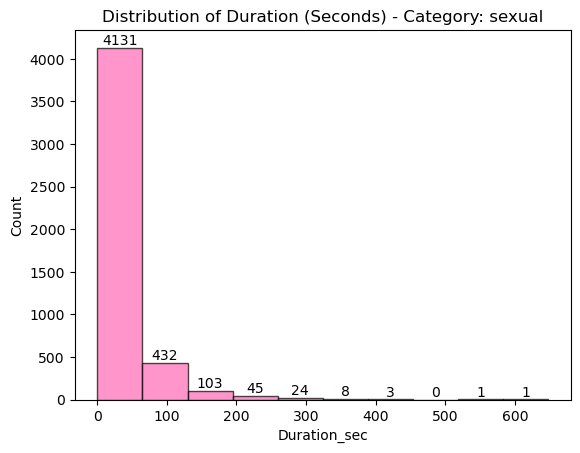

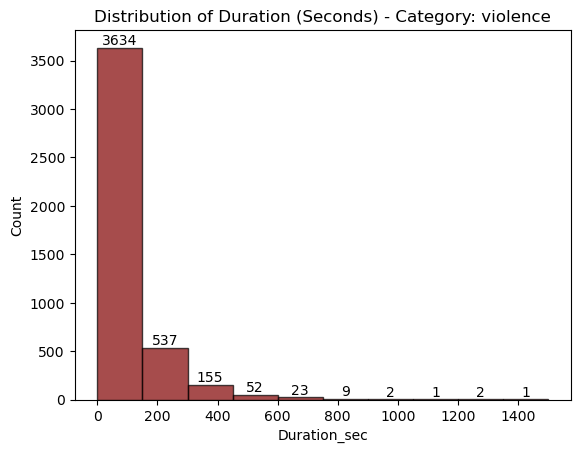

In [39]:
for category, group_df in movie_tags.groupby('category'):
    color = category_colors.get(category, 'blue')  # Use blue as default color if rating not found in dictionary
    plot_histogram_with_counts(group_df, 'duration_sec', title='Distribution of Duration (Seconds)',title_suffix=' - Category: '+category, color=color)

Language has by far the most short durations, but Other and Sexual also have really short durations as it doesn't have many that go for as long as the others. All of them are concentrated under taht 200 second mark (3.33 minutes) so most of the time all these categories are happening in short spurts throughout movies. 

## Conclusion <a id='Conclusion'>

In this notebook, we were able to explore the data a bit more to understand the trends and correlation between values. Here are some of the insights we have gained from this analysis:

    - There are some movies with the same name, but are different movies. 
    Some are remakes with the same rating, some have different ratings. May be a point of confusion for our model. 
    
    - Data trends to more recent movies. 
    
    - R is the most common rating. TV ratings are included but there is not a lot of data total in the dataset for those. 
    TV rating of movies tend to be shorter, but have peaks around the mean. 
    
    - The common studios that are not other have a higher rate of PG-13 movies than other studios. 
    Also, Netflix has the majority of TV-MA movies. 
    
    - Overall, there is not much of a trend with a specific rating and the number of studios. 
    This shows that studios will collaborate regardless of the type of movie. 
    
    - There looks to be some sort of correlation between the duration and occurence of a movie tag. 
    If the tag has a high occurrence count but a lower duration, the tag is more likely to be a language tag. 

We now have a good understanding of the data structure and values so we can understand how our models may use the data. We will now move to the Preprocessing and Modeling step for this data. 